In [47]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [49]:
y=df['salary_more_then_100k']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [50]:
x=df.drop('salary_more_then_100k',axis=1)
x.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [51]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
x.company=le.fit_transform(df['company'])
x.job=le.fit_transform(df['job'])
x.degree=le.fit_transform(df['degree'])
x.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [54]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [55]:
clf=DecisionTreeClassifier()

In [56]:
clf.fit(x,y)


DecisionTreeClassifier()

In [57]:
clf.predict([[2,2,0],[1,1,0]])

array([0, 1], dtype=int64)

In [58]:
df.head(10)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


[Text(0.4, 0.9166666666666666, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2, 0.75, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.30000000000000004, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3, 0.5833333333333334, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.75, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.5833333333333334, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.4166666666666667, 'job <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.

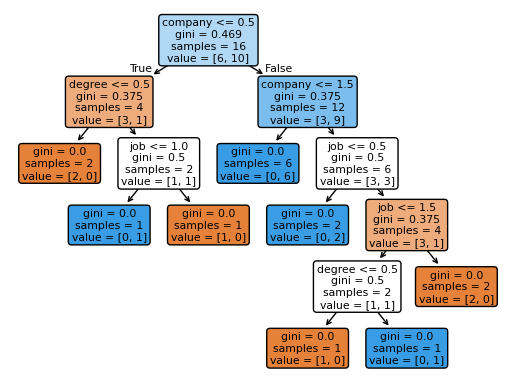

In [61]:
from sklearn import tree
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)